# Handwritten Digits
The purpose of this experiment is not to develop a state-of-the-art digit classifier, but rather to test if the "home-made" fully connected neural network performs decently on a more complex example.

In [165]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import math

# Show results
from sklearn.metrics import confusion_matrix
import seaborn as sns

# My network
import MyNeuralNet

# Data
from sklearn.datasets import load_digits

(1797, 64)


<Figure size 432x288 with 0 Axes>

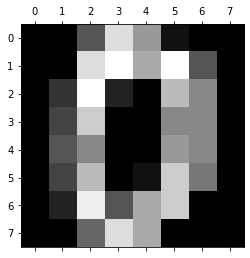

In [166]:
digits = load_digits()
print(digits.data.shape)
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

In [167]:
X = digits.data
enc = OneHotEncoder(handle_unknown='ignore')
Y = enc.fit_transform(digits.target.reshape(-1,1)).toarray()

### Test the network
Two hidden layers are used with 50 and 30 neurons respectively



In [171]:
def accuracy(y_pred, y):
    pred = np.argmax(y_pred, axis = 1)
    y_= np.argmax(y, axis = 1)    
    accuracy = len(np.where(pred == y_)[0]) / len(y)
    return accuracy

def testNetwork(network, X, Y, iterations):
    X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.33, random_state=42)
    
    # Lists to keep track of accuracy & cost
    accuracy_list = []
    iter_list = []
    train_cost = []
    test_cost = []
    for i in range(iterations): 
        network.learn(X_train, y_train)
        if (i%10 ==0 ):
            iter_list.append(i)
            y_pred = network.calc(X_test)
            accuracy_list.append(accuracy(y_pred, y_test))            
            train_cost.append(network.cost(X_train, y_train).mean( axis = 0))
            test_cost.append(network.cost(X_test, y_test).mean(axis = 0))        
        
    # Calculate the confusion matrix
    y_pred = network.calc(X_test)
    pred = np.argmax(y_pred, axis = 1 )
    y_= np.argmax(y_test, axis = 1 )
    cf_matrix = confusion_matrix(y_, pred)
    sns.heatmap(cf_matrix, annot=True)    
    
    # Plot confusion matrix, cost and accuracy
    train_cost = np.array(train_cost).mean(axis = 1)    
    plt.subplots()
    plt.plot(iter_list, train_cost)
    test_cost = np.array(test_cost).mean(axis = 1)
    plt.plot(iter_list, test_cost)
    plt.title("Train (blue) & test (orange) cost")
    print("final accuracy: ", accuracy_list[-1])
    plt.subplots()
    plt.plot(iter_list, accuracy_list)
    plt.title("Accuracy")

In [174]:
nn = MyNeuralNet.NeuralNet(64,10,[50,30], learning_rate = 0.002)

final accuracy:  0.9478114478114478


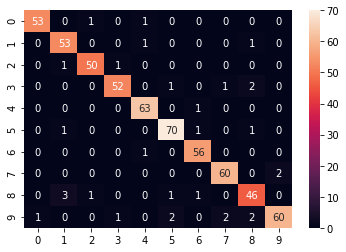

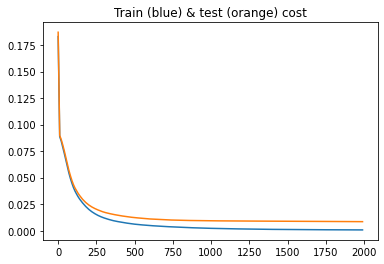

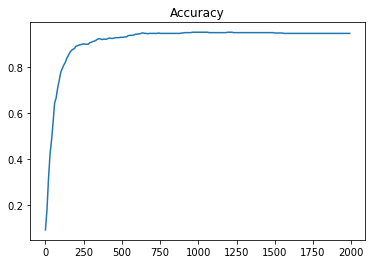

In [175]:
testNetwork(nn, X, Y, 2000)

### Results
Even a simple fully connected network with 2 hidden layers containing 50 and 30 neurons respectively, can achieve 94.78% accuracy on a test set.